<a href="https://colab.research.google.com/github/ABHAYB642/Sparks-Foundation-Task-8/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ABHAY BIRAMANE**
## Covid-19 Timeline Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172799 entries, 0 to 172798
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    172799 non-null  object 
 1   continent                                   162531 non-null  object 
 2   location                                    172799 non-null  object 
 3   date                                        172799 non-null  object 
 4   total_cases                                 168765 non-null  float64
 5   new_cases                                   168597 non-null  float64
 6   new_cases_smoothed                          166599 non-null  float64
 7   total_deaths                                150725 non-null  float64
 8   new_deaths                                  150736 non-null  float64
 9   new_deaths_smoothed                         148585 non-null  float64
 

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.687650e+05,1.685970e+05,1.665990e+05,1.507250e+05,150736.000000,148585.000000,167983.000000,167815.000000,165823.000000,149956.000000,...,109611.000000,108108.000000,70851.000000,127808.000000,161385.000000,140791.000000,6.023000e+03,6023.000000,6023.000000,6023.000000
mean,2.735282e+06,1.222061e+04,1.223552e+04,5.967802e+04,168.802555,170.511093,32587.171040,177.988455,177.386703,531.329908,...,10.644131,32.783357,50.778035,3.028246,73.599641,0.725491,3.859263e+04,9.562316,15.841307,1023.021273
std,1.686708e+07,8.798907e+04,8.632448e+04,3.123204e+05,823.398703,808.586182,59105.123719,727.498325,567.106512,810.546190,...,10.580916,13.523266,31.812045,2.449186,7.486530,0.149945,1.072522e+05,16.273081,29.596734,1458.955743
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.174000e+03,1.000000e+00,7.000000e+00,8.300000e+01,0.000000,0.143000,656.276000,0.032000,1.629000,19.875000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-4.500000e+01,-0.455000,-0.580000,-19.127442
50%,2.882500e+04,7.900000e+01,1.080000e+02,8.180000e+02,2.000000,2.429000,5078.475000,11.401000,19.283000,139.529000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.525700e+03,6.290000,7.420000,508.816121
75%,3.196860e+05,1.076000e+03,1.174571e+03,7.616000e+03,19.000000,21.143000,40923.021000,103.320000,124.875000,756.951250,...,19.300000,41.300000,82.502000,4.000000,78.950000,0.845000,2.611140e+04,14.610000,22.485000,1690.745408
max,4.848988e+08,4.089024e+06,3.436827e+06,6.133410e+06,18021.000000,14689.286000,706541.904000,51427.491000,16052.608000,6359.734000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9339.469641


In [ ]:
df.shape

(172799, 67)

In [ ]:
df.count()

iso_code                                   172799
continent                                  162531
location                                   172799
date                                       172799
total_cases                                168765
                                            ...  
human_development_index                    140791
excess_mortality_cumulative_absolute         6023
excess_mortality_cumulative                  6023
excess_mortality                             6023
excess_mortality_cumulative_per_million      6023
Length: 67, dtype: int64

In [ ]:
print(df.isnull().sum())

iso_code                                        0
continent                                   10268
location                                        0
date                                            0
total_cases                                  4034
                                            ...  
human_development_index                     32008
excess_mortality_cumulative_absolute       166776
excess_mortality_cumulative                166776
excess_mortality                           166776
excess_mortality_cumulative_per_million    166776
Length: 67, dtype: int64


In [ ]:
df1=df[["date","total_cases","new_cases","total_deaths","new_tests","total_tests"]]

In [ ]:
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [ ]:
df1.date=pd.to_datetime(df.date)
df1.set_index('date',inplace=True)
df1.head()
df1.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-03-25,245645.0,451.0,5436.0,NaN,NaN
2022-03-26,245645.0,0.0,5436.0,NaN,NaN
2022-03-27,245820.0,175.0,5438.0,NaN,NaN
2022-03-28,245927.0,107.0,5438.0,NaN,2176708.0
2022-03-29,246042.0,115.0,5439.0,NaN,NaN


Text(0.5, 0, 'Month')

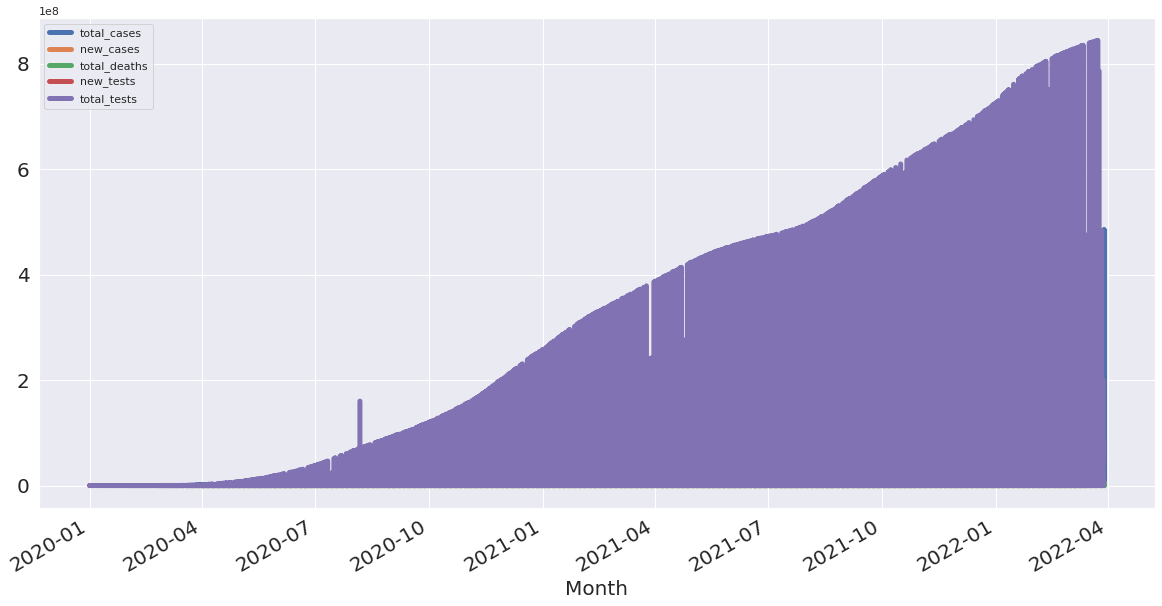

In [ ]:
df1.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

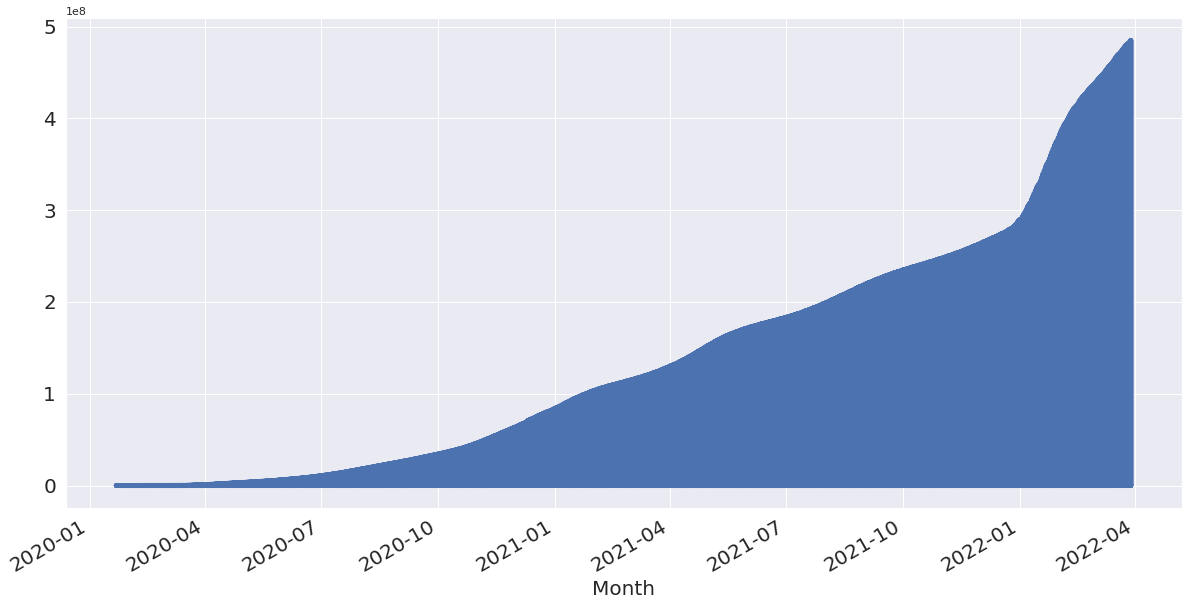

In [ ]:
df1.total_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

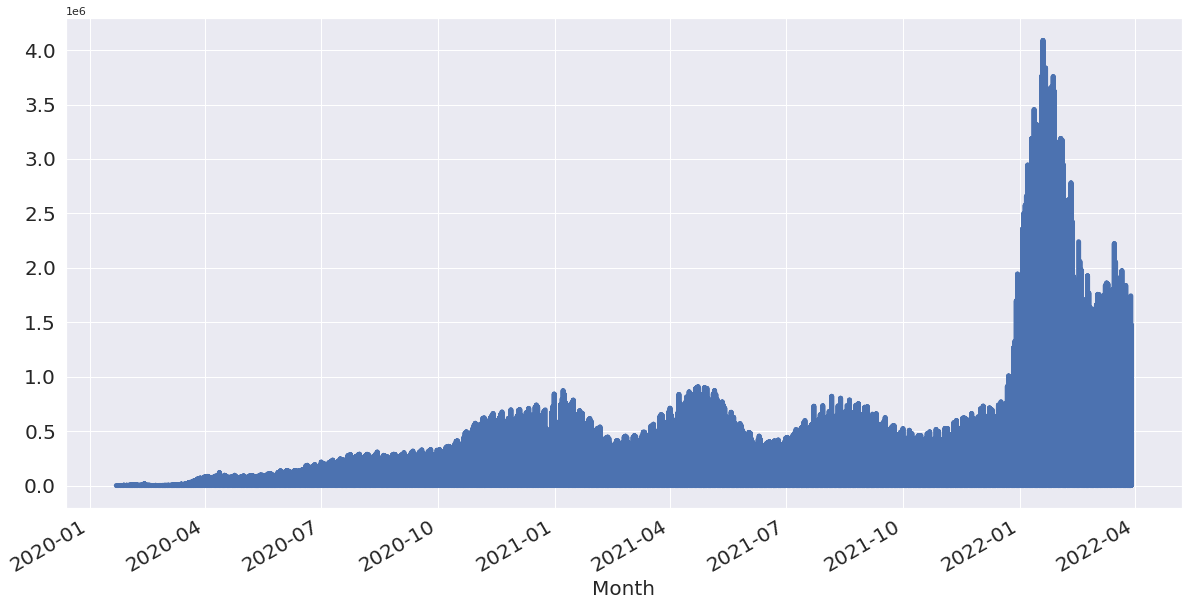

In [ ]:
df1.new_cases.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

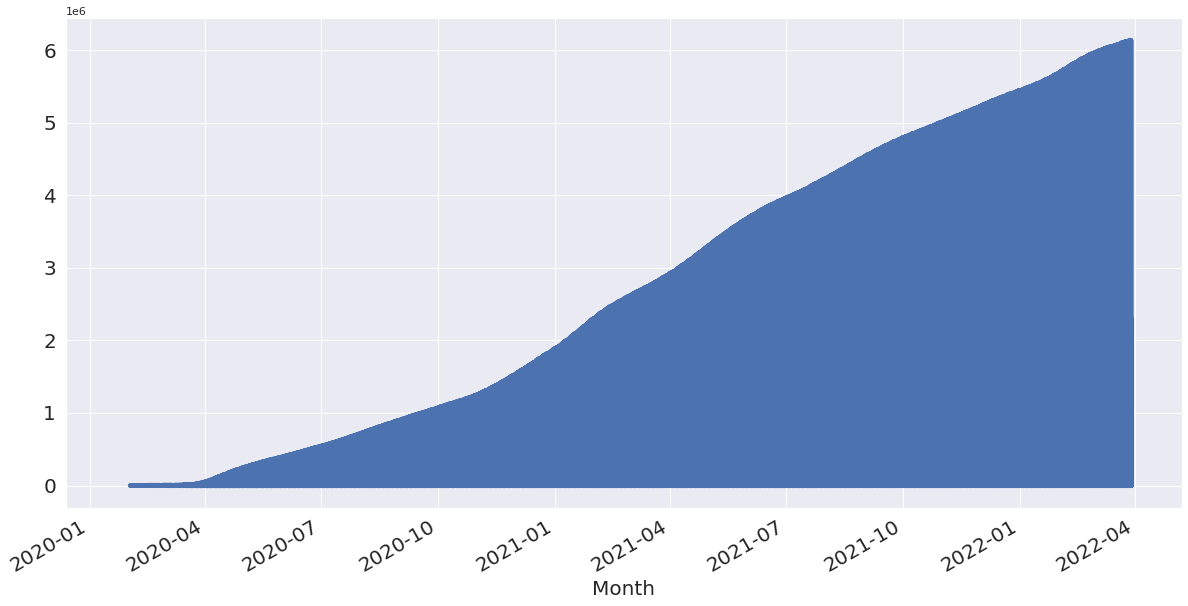

In [ ]:
df1.total_deaths.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

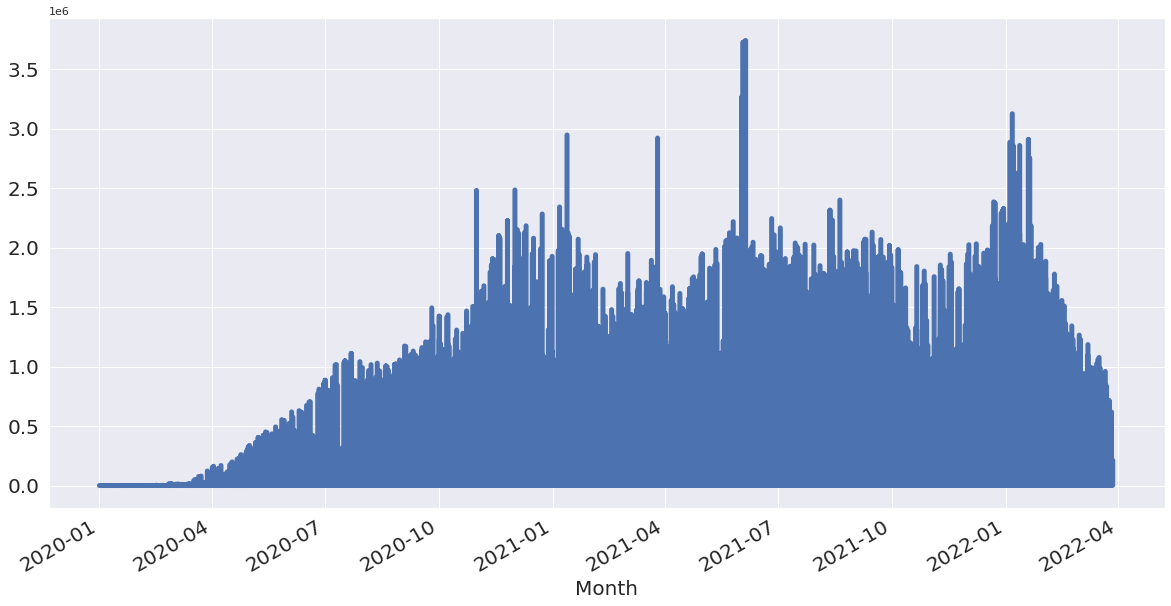

In [ ]:
df1.new_tests.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

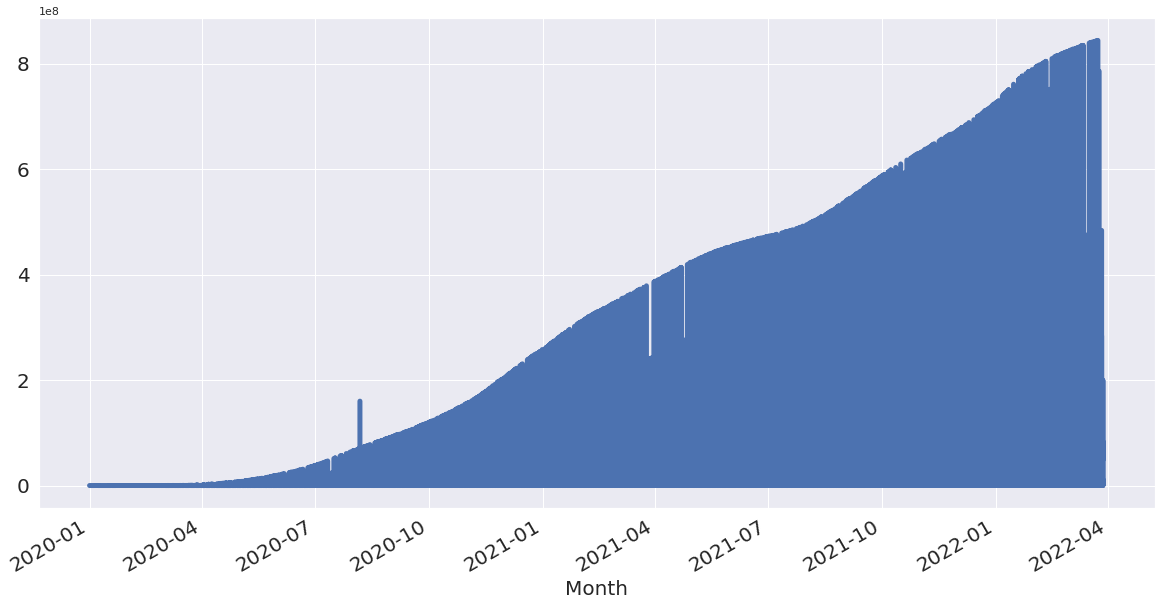

In [ ]:
df1.total_tests.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

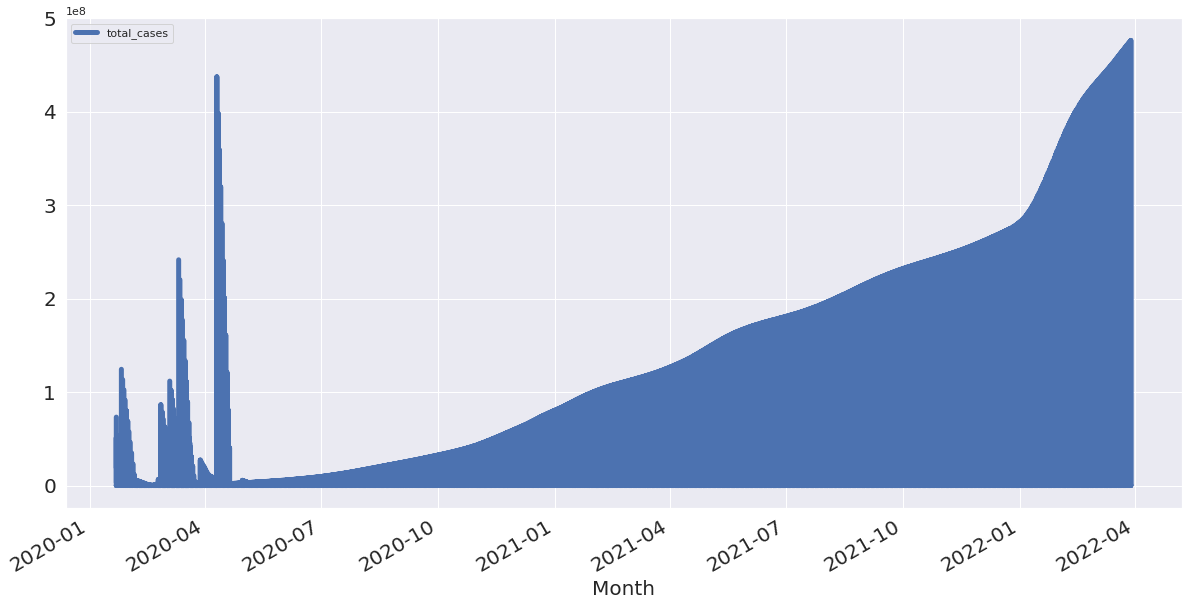

In [ ]:
total_cases=df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

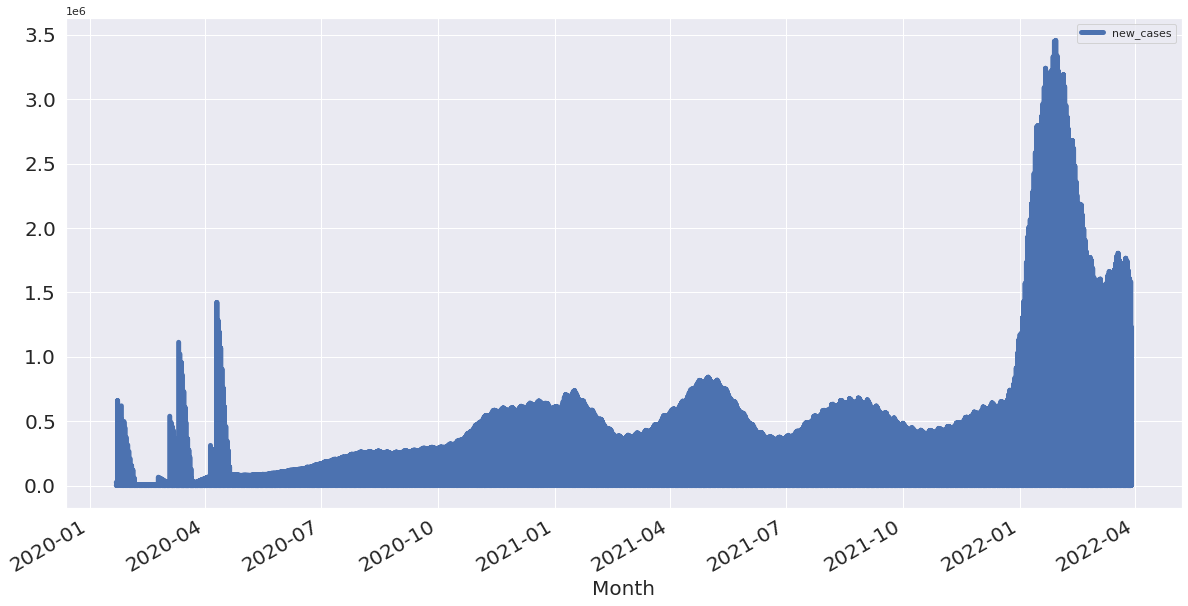

In [ ]:
new_cases=df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

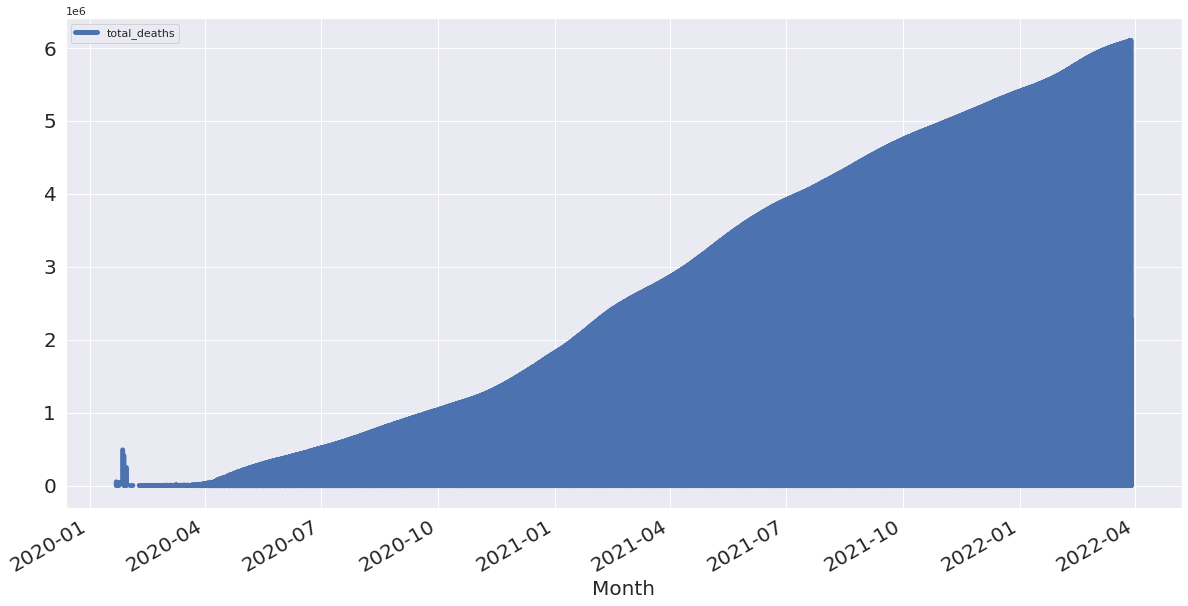

In [ ]:
total_deaths=df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

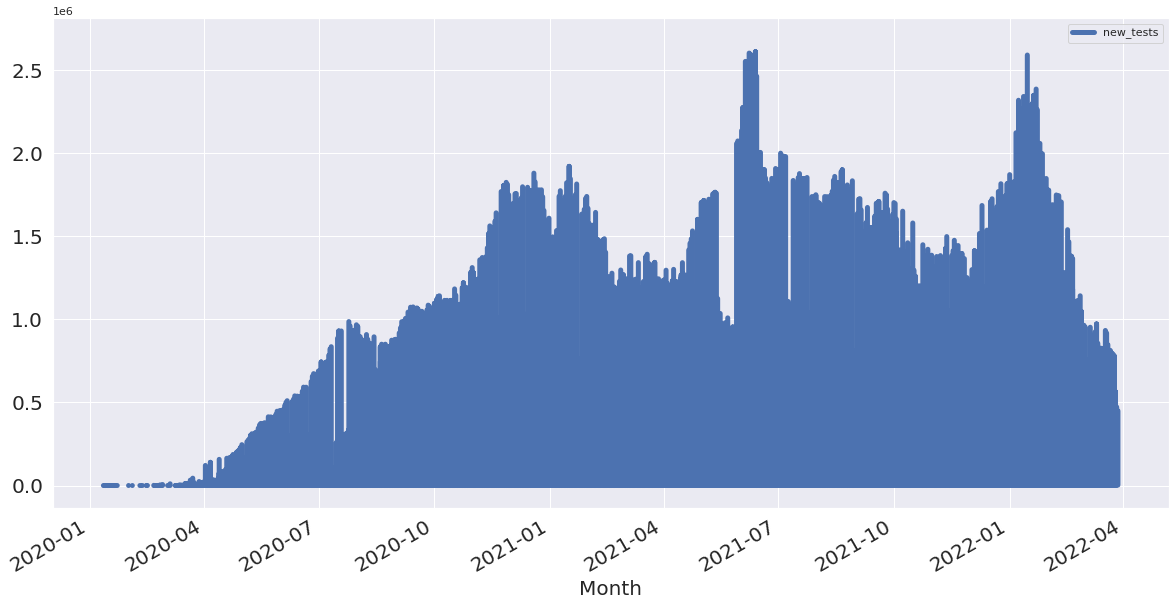

In [ ]:
new_tests=df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

Text(0.5, 0, 'Month')

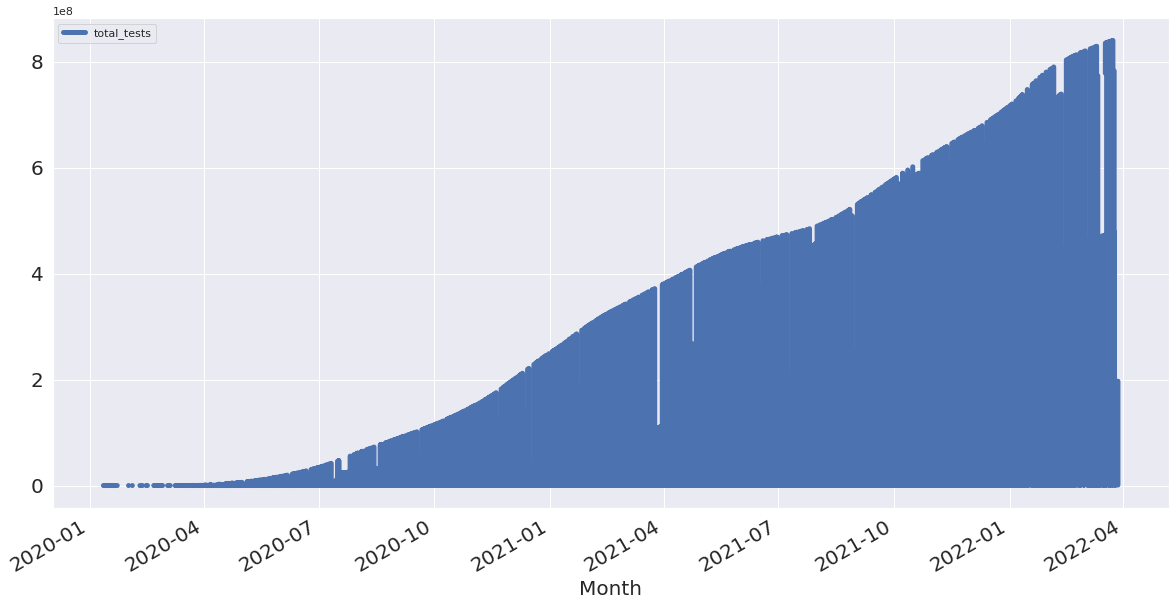

In [ ]:
total_tests=df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Month',fontsize=20)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf

In [ ]:
colab_pdf('Covid-19 Analysis.ipynb')





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Covid-19 Analysis.ipynb to pdf
[NbConvertApp] Support files will be in Covid-19 Analysis_files/
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Making directory ./Covid-19 Analysis_files
[NbConvertApp] Writing 56558 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.te

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'